In [13]:
#Cargar las librerías y módulos necesarios. Cargar el archivo.
#Vamos a importar el archivo considerando los valores ausentes y pasándolos a NaN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
path = "ejercicio_Missing_Values.xlsx"
treat_NaNs = [" ","",".","-","._",",",";",":","''","'","/","?","!","[]","#",
"´","&","$","()","{}","ç","Ç","`","^","*","+","|","%","n/a","N/A","--","NA","na"]
df = pd.read_excel(path, na_values=treat_NaNs)
df

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
0,José,Maza,Redondo,H,Madrid,Madrid,61025400Y,22.0,156.0,60.0,NO,1000.0,Solter/x,SI,SÍ,SÍ,4411125322A
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,73534066F,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NaN,4411125322A
2,Pablo,Gálvez,González,H,Talavera de la Reina,Toledo,10223810K,23.0,177.0,70.0,NO,1325.0,Casad/x,SI,SÍ,SÍ,4411125322A
3,María,Gallego,Martínez,M,Sevilla,Sevilla,32770305C,45.0,172.0,89.0,NO,1500.0,Solter/x,No,NO,SÍ,4411125322A
4,José Luis,Fernández,Ortega,H,Oviedo,Asturias,04614346V,37.0,179.0,82.0,SÍ,1662.5,Solter/x,No,NO,SÍ,4411125322A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Juan Manuel,Sendra,Rubio,H,Valencia,Valencia,39455398W,1.0,78.0,10.0,SÍ,NaN,NaN,NO,NO,NaN,4411125322A
65,Ángel,Castro,Guisado,H,Torrejón de Ardoz,Madrid,33261507M,2.0,86.0,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN
66,Antonio,Elizalde,Martin,H,Colmenar Viejo,Madrid,39455398W,8.0,125.0,25.0,NO,0.0,Solter/x,SI,NO,NaN,4411125322A
67,Ángel,Guerrero,Alonso,H,Puertollano,Ciudad Real,60423158L,9.0,135.0,30.0,SÍ,0.0,Solter/x,SI,NO,NaN,NaN


In [14]:
#Miramos las primeras 15 filas para obtener algo de info sobre los data points.
df.head(15)

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
0,José,Maza,Redondo,H,Madrid,Madrid,61025400Y,22.0,156.0,60.0,NO,1000.0,Solter/x,SI,SÍ,SÍ,4411125322A
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,73534066F,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NaN,4411125322A
2,Pablo,Gálvez,González,H,Talavera de la Reina,Toledo,10223810K,23.0,177.0,70.0,NO,1325.0,Casad/x,SI,SÍ,SÍ,4411125322A
3,María,Gallego,Martínez,M,Sevilla,Sevilla,32770305C,45.0,172.0,89.0,NO,1500.0,Solter/x,No,NO,SÍ,4411125322A
4,José Luis,Fernández,Ortega,H,Oviedo,Asturias,04614346V,37.0,179.0,82.0,SÍ,1662.5,Solter/x,No,NO,SÍ,4411125322A
5,Manuel,García,Muñoz,H,Madrid,Madrid,81971380R,59.0,188.0,122.0,SÍ,1825.0,Divorciad/x,No,NO,NaN,4411125322A
6,Rosa,Cano,Gómez,M,NaN,NaN,39455398W,55.0,NaN,NaN,NaN,2100.0,Divorciad/x,No,SÍ,SÍ,4411125322A
7,Sebastián,Caparros,Sánchez,H,Madrid,Madrid,06708146N,78.0,165.0,66.0,SÍ,2150.0,Divorciad/x,No,NaN,NaN,4411125322A
8,Antonio,Morante,Molina,H,Candelaria,S.C. de Tenerife,35261507M,110.0,145.0,70.0,SÍ,2312.5,Solter/x,SI,NaN,NaN,4411125322A
9,Jesús,López,Núñez,H,Cartagena,Murcia,NaN,2.0,88.0,13.0,NO,0.0,Solter/x,SI,NO,NaN,4411125322A


In [15]:
df.info()
#Vemos que solo hay cuatro atributos de tipo numérico (números con decimales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nombre                          67 non-null     object 
 1   Apellido 1                      67 non-null     object 
 2   Apellido 2                      67 non-null     object 
 3   Sexo                            66 non-null     object 
 4   Municipio                       64 non-null     object 
 5   Provincia                       65 non-null     object 
 6   NIF                             58 non-null     object 
 7   Edad                            67 non-null     float64
 8   Estatura                        57 non-null     float64
 9   Masa                            56 non-null     float64
 10  Hijos                           63 non-null     object 
 11  Ingresos                        62 non-null     float64
 12  Estado Civil                    61 non

In [16]:
#Miramos cuántos missing values hay por cada atributo
print(df.isna().sum())

def missing_percentage(data):
    percent = data.isnull().sum() * 100 / len(data)
    percent = round(percent,2)
    missing_value_df = pd.DataFrame({'percent_missing (%)': percent})
    return missing_value_df 

print(missing_percentage(df))

Nombre                             2
Apellido 1                         2
Apellido 2                         2
Sexo                               3
Municipio                          5
Provincia                          4
NIF                               11
Edad                               2
Estatura                          12
Masa                              13
Hijos                              6
Ingresos                           7
Estado Civil                       8
Vacunadx                           5
CARNÉ CONDUCIR                    10
Consumidorx Alcohol Esporádico    43
REFERENCIA ESTUDIO                 5
dtype: int64
                                percent_missing (%)
Nombre                                         2.90
Apellido 1                                     2.90
Apellido 2                                     2.90
Sexo                                           4.35
Municipio                                      7.25
Provincia                                     

In [17]:
#NaN consumidores de alcohol se considera como NO
df['Consumidorx Alcohol Esporádico'] = df['Consumidorx Alcohol Esporádico'].fillna('NO')
#Consideraremos que una persona entre 0 y 12 años no puede generar ingresos. También consideramos que un menor de 16 no puede estar casado.
df.loc[(df['Edad'] >= 0) & (df['Edad'] <= 12), 'Ingresos'] = 0.0
df.loc[df['Edad'] < 16, 'Estado Civil'] = 'Solter/x'
#En la columna de vacunados hay dos tipos de no, vamos a ponerlos igual y lo mismo con los síes
df.loc[df['Vacunadx'] == 'No', 'Vacunadx'] = 'NO'
df.loc[df['Vacunadx'] == 'SI', 'Vacunadx'] = 'SÍ'
df.head(15)

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
0,José,Maza,Redondo,H,Madrid,Madrid,61025400Y,22.0,156.0,60.0,NO,1000.0,Solter/x,SÍ,SÍ,SÍ,4411125322A
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,73534066F,22.0,160.0,65.0,NO,1200.0,Solter/x,SÍ,NaN,NO,4411125322A
2,Pablo,Gálvez,González,H,Talavera de la Reina,Toledo,10223810K,23.0,177.0,70.0,NO,1325.0,Casad/x,SÍ,SÍ,SÍ,4411125322A
3,María,Gallego,Martínez,M,Sevilla,Sevilla,32770305C,45.0,172.0,89.0,NO,1500.0,Solter/x,NO,NO,SÍ,4411125322A
4,José Luis,Fernández,Ortega,H,Oviedo,Asturias,04614346V,37.0,179.0,82.0,SÍ,1662.5,Solter/x,NO,NO,SÍ,4411125322A
5,Manuel,García,Muñoz,H,Madrid,Madrid,81971380R,59.0,188.0,122.0,SÍ,1825.0,Divorciad/x,NO,NO,NO,4411125322A
6,Rosa,Cano,Gómez,M,NaN,NaN,39455398W,55.0,NaN,NaN,NaN,2100.0,Divorciad/x,NO,SÍ,SÍ,4411125322A
7,Sebastián,Caparros,Sánchez,H,Madrid,Madrid,06708146N,78.0,165.0,66.0,SÍ,2150.0,Divorciad/x,NO,NaN,NO,4411125322A
8,Antonio,Morante,Molina,H,Candelaria,S.C. de Tenerife,35261507M,110.0,145.0,70.0,SÍ,2312.5,Solter/x,SÍ,NaN,NO,4411125322A
9,Jesús,López,Núñez,H,Cartagena,Murcia,NaN,2.0,88.0,13.0,NO,0.0,Solter/x,SÍ,NO,NO,4411125322A


In [18]:
#Valores únicos por cada atributo
unique_counts = df.nunique()
print(unique_counts)

Nombre                            45
Apellido 1                        54
Apellido 2                        58
Sexo                               2
Municipio                         48
Provincia                         25
NIF                               30
Edad                              34
Estatura                          35
Masa                              34
Hijos                              2
Ingresos                          38
Estado Civil                       3
Vacunadx                           2
CARNÉ CONDUCIR                     2
Consumidorx Alcohol Esporádico     2
REFERENCIA ESTUDIO                 1
dtype: int64


C:\Users\endik\AppData\Local\Temp\ipykernel_6492\3275602043.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_age = df.groupby(['Rango Edad', 'Sexo'])['Estatura'].mean().reset_index()


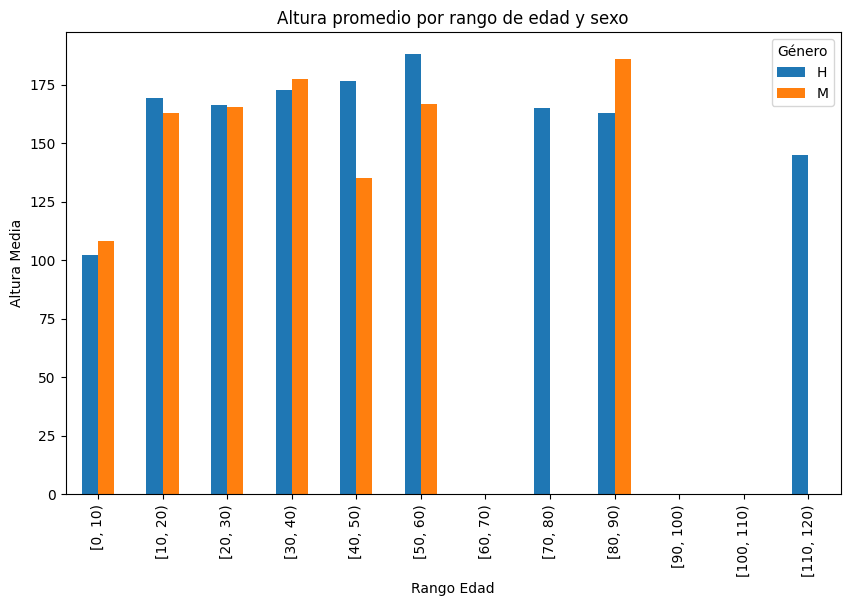

In [19]:
# Graficar estatura media por rangos de edad (de 10 en 10) y género
df['Rango Edad'] = pd.cut(df['Edad'], bins=range(0, 130, 10), right=False)
grouped_data_age = df.groupby(['Rango Edad', 'Sexo'])['Estatura'].mean().reset_index()

# Pivotar las variables para poder ver con claridad los resultados al representarlos
pivot_data_age = grouped_data_age.pivot(index='Rango Edad', columns='Sexo', values='Estatura')

#Generar gráfica
pivot_data_age.plot(kind='bar', figsize=(10, 6))
plt.title('Altura promedio por rango de edad y sexo')
plt.xlabel('Rango Edad')
plt.ylabel('Altura Media')
plt.legend(title='Género')
plt.show()

#Se parecia que hay rangos de edad para los que se carece de valores

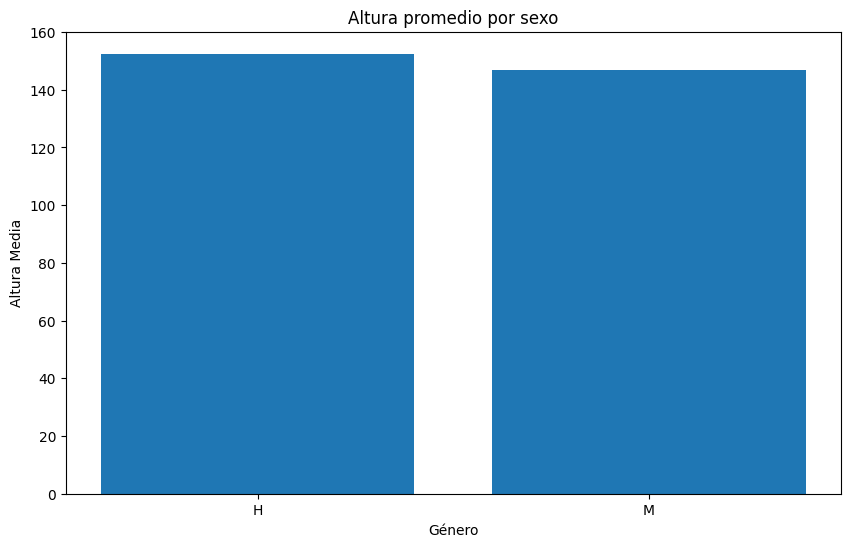

In [20]:
grouped_data_sex = df.groupby(['Sexo'])['Estatura'].mean().reset_index()

#Generar gráfica
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_sex['Sexo'], grouped_data_sex['Estatura'])
plt.title('Altura promedio por sexo')
plt.xlabel('Género')
plt.ylabel('Altura Media')
plt.show()

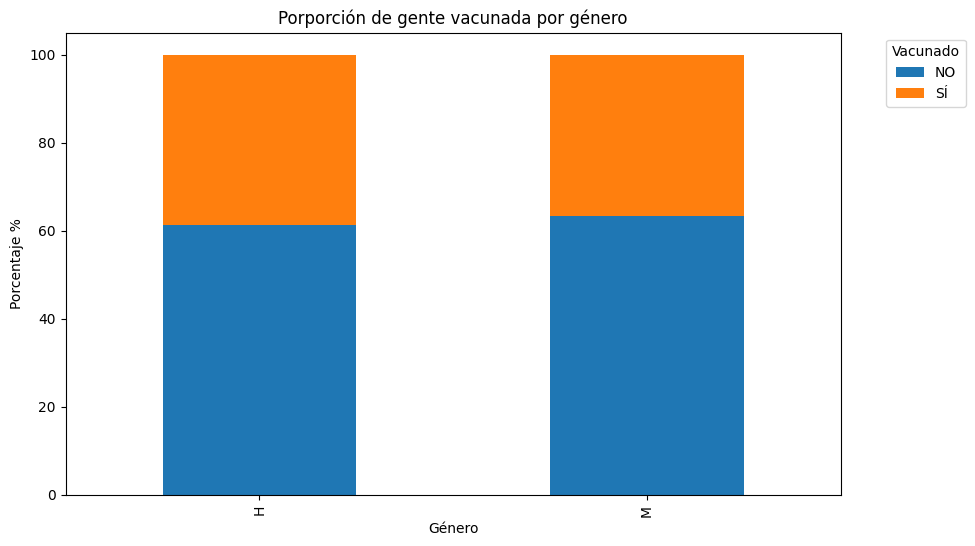

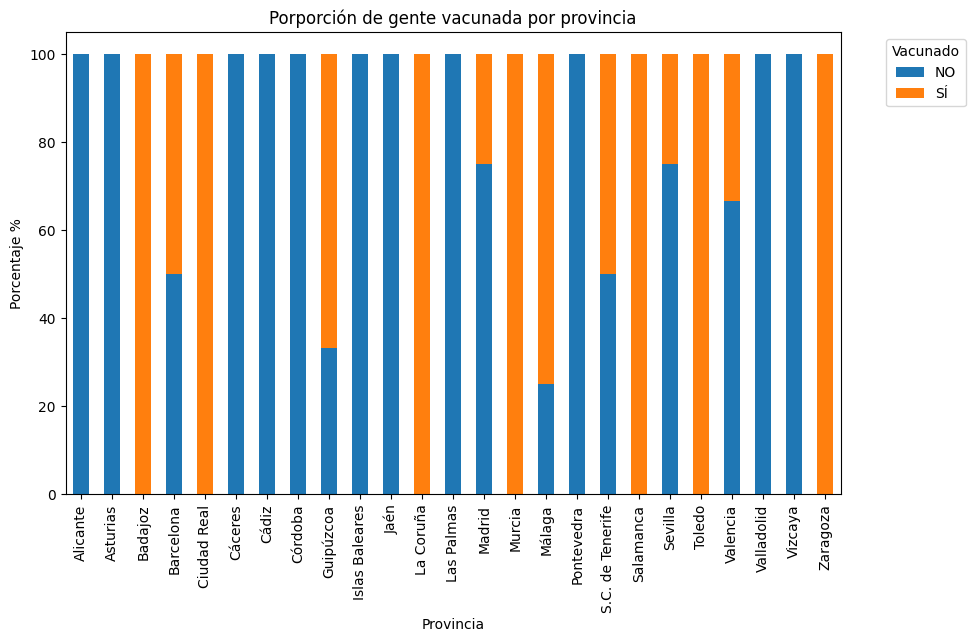

In [28]:
# Proporciones de vacunados por género
# Paso 1: quitar los NaN de las columnas que nos interesan
columns_to_dropna = ['Vacunadx', 'Sexo', 'Provincia']
df_dropna_filter = df.dropna(subset=columns_to_dropna)

# Paso 2: agrupar por género
grouped_data_gender = df_dropna_filter.groupby('Sexo')['Vacunadx'].value_counts(normalize=True).unstack() * 100

# Paso 3: generar las gráficas
grouped_data_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Porporción de gente vacunada por género')
plt.xlabel('Género')
plt.ylabel('Porcentaje %')
plt.legend(title='Vacunado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Proporciones de vacunados por provincia
# Paso 2: agrupar por género
grouped_data_province = df_dropna_filter.groupby('Provincia')['Vacunadx'].value_counts(normalize=True).unstack() * 100

# Paso 3: generar las gráficas
grouped_data_province.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Porporción de gente vacunada por provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje %')
plt.legend(title='Vacunado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


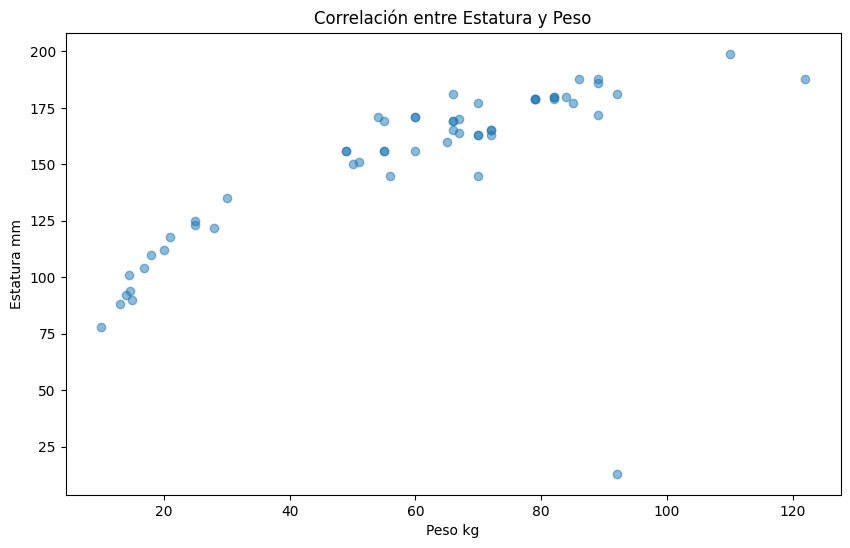

In [29]:
# Correlación Estatura Peso
columns_to_dropna2 = ['Estatura', 'Masa']
df_dropna_filter2 = df.dropna(subset=columns_to_dropna2)
plt.figure(figsize=(10, 6))
plt.scatter(df_dropna_filter2['Masa'], df_dropna_filter2['Estatura'], alpha=0.5)
plt.title('Correlación entre Estatura y Peso')
plt.xlabel('Peso kg')
plt.ylabel('Estatura mm')
plt.grid(False)
plt.show()
# Se aprecia una correlación positiva entre el peso y la altura. Asimismo, se observa un outlier en el que el peso y la altura no concuerdan y que posiblemente se trate de un error, ya que no hay nadie que mida en torno a los 15mm y que encima pese cerca de 90 kg